 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [546]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt                             #CHAT GPT
from matplotlib.dates import MonthLocator, DateFormatter    #CHAT GPT
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [547]:
# Reading whale returns
whale_csv_path = Path("/Users/montygash/Desktop/FinTechWork/python-homework/Starter_Code 2/Resources/whale_returns.csv")

# Read .csv to create dateframe, infer date time format
whale_df = pd.read_csv(whale_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)

#whale_df.index << WHY??

# View both ends of dataframe
print(whale_df.head())
print(whale_df.tail())



            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                             

/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/855251706.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


In [548]:
# Count nulls
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [549]:
# Drop nulls
whale_df = whale_df.dropna().copy()
# Ensure nulls dropped
whale_df.isnull().mean()


SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [550]:
# Reading algorithmic returns
algo_csv_path = Path("/Users/montygash/Desktop/FinTechWork/python-homework/Starter_Code 2/Resources/algo_returns.csv")

# Read .csv to create dateframe, infer date time format
algo_df = pd.read_csv(algo_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)

# View both ends of dataframe
print(algo_df.head())
print(algo_df.tail())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
              Algo 1    Algo 2
Date                          
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358


/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/1887157338.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


In [551]:
# Count nulls
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [552]:
# Drop nulls
algo_df = algo_df.dropna().copy()

# Ensure nulls dropped
print(algo_df.isnull().mean())

# View both ends of dataframe
print(algo_df.head())
print(algo_df.tail())

Algo 1    0.0
Algo 2    0.0
dtype: float64
              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
              Algo 1    Algo 2
Date                          
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [553]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("/Users/montygash/Desktop/FinTechWork/python-homework/Starter_Code 2/Resources/sp500_history.csv")

# Read .csv to create dateframe, infer date time format
sp500_df = pd.read_csv(sp500_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)

# Sort values by ascending 
sp500_df = sp500_df.sort_values("Date")

# View both ends of dataframe
print(sp500_df.head())
print(sp500_df.tail())



               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
               Close
Date                
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68


/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/2824217284.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88309/2824217284.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


In [554]:
# Check Data Types
print(whale_df.dtypes)
print("_____")
print(algo_df.dtypes)
print("_____")
print(sp500_df.dtypes)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object
_____
Algo 1    float64
Algo 2    float64
dtype: object
_____
Close    object
dtype: object


In [555]:
# Fix Data Types

# Remove '$'
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")

# Create 'Close' as a float type variable
sp500_df["Close"] = sp500_df["Close"].astype("float64")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [556]:
# Calculate Daily Returns
sp500_pct_change_df = sp500_df.pct_change()

# View both ends of dataframe
print(sp500_pct_change_df.head())
print(sp500_pct_change_df.tail())


               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
               Close
Date                
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841


In [557]:
# Drop nulls
sp500_pct_change_df = sp500_pct_change_df.dropna().copy()

# Ensure nulls dropped
sp500_pct_change_df.isnull().mean() * 100

Close    0.0
dtype: float64

In [608]:
# Rename `Close` Column to be specific to this portfolio.

sp500_pct_change_df = sp500_pct_change_df.rename(columns={"Close": "SP500 Daily % Return"})

# View both ends of dataframe
print(sp500_pct_change_df.head())
print(sp500_pct_change_df.tail())

            SP500 Daily % Return
Date                            
2012-10-02              0.000872
2012-10-03              0.003624
2012-10-04              0.007174
2012-10-05             -0.000322
2012-10-08             -0.003457
            SP500 Daily % Return
Date                            
2019-04-16              0.000509
2019-04-17             -0.002274
2019-04-18              0.001579
2019-04-22              0.001012
2019-04-23              0.008841


,SP500 Daily % Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [628]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_pct_change_df], axis=1, join="inner")

# View dataframe
combined_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily % Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

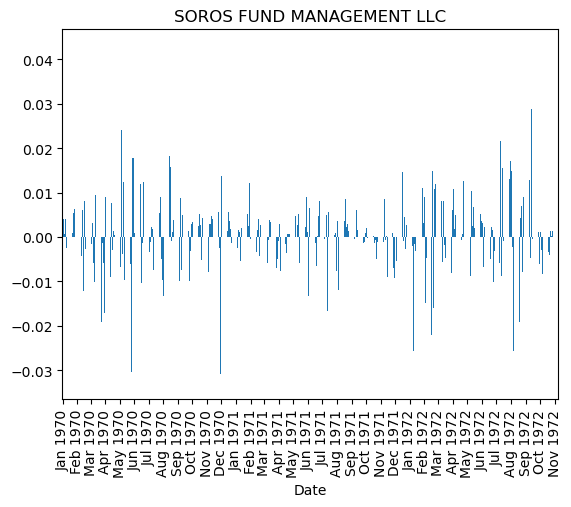

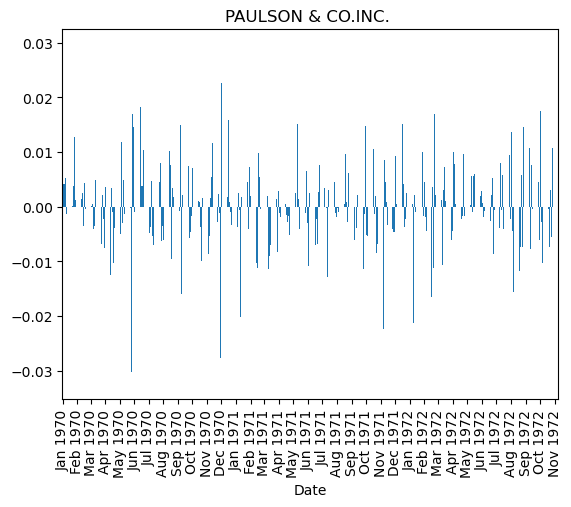

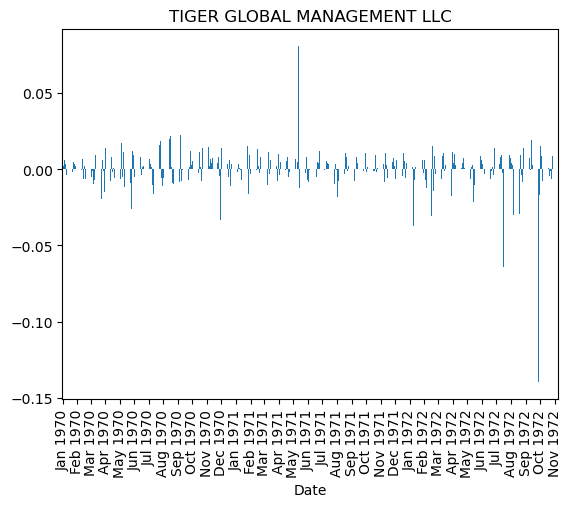

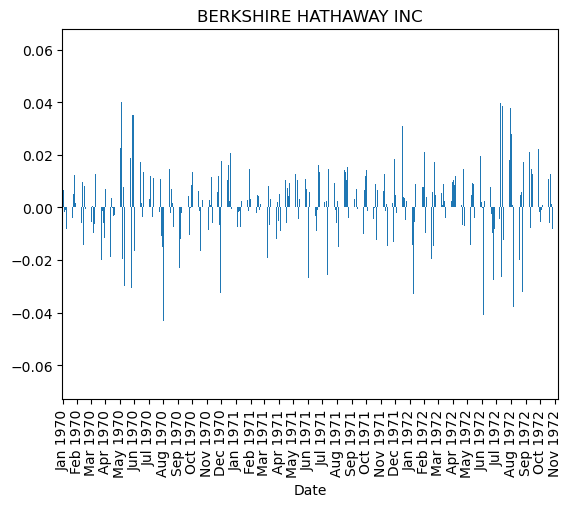

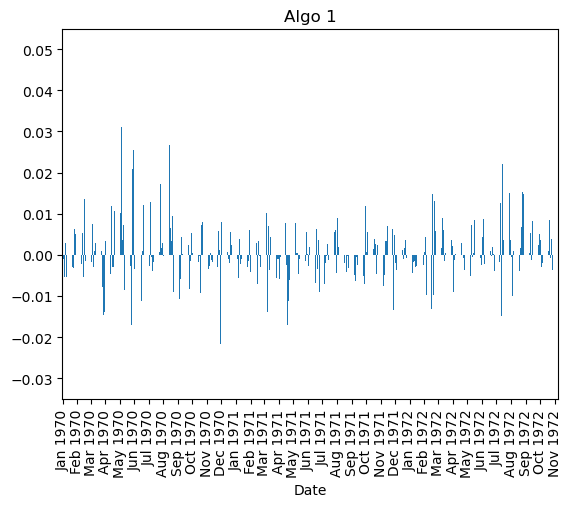

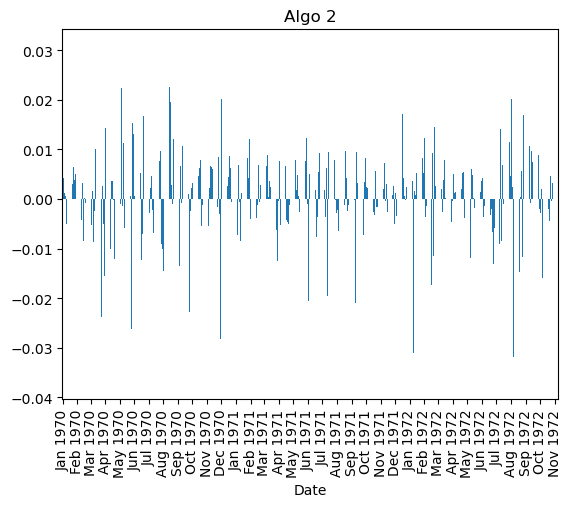

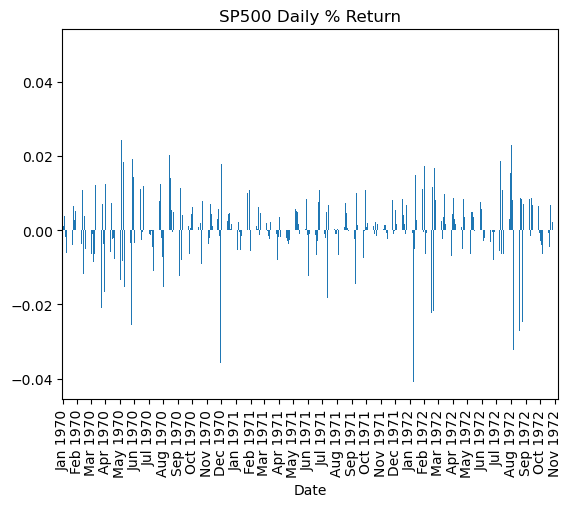

In [560]:

returns_plot_list = []  # Create list to save plots so that we can easily access them later


# Loop that iterates through our columns in the combined dataframe of the returns and creates a plot for each column
# Add each new plot to our list
# Format x-axis to improve readablility
for column in combined_df.columns:                                             # help from CHAT GPT
    new_plot = combined_df[column].plot(kind='bar', title=column)              # help from CHAT GPT
    returns_plot_list.append(new_plot)
    new_plot.xaxis.set_major_locator(MonthLocator())                            #help from CHAT GPT
    new_plot.xaxis.set_major_formatter(DateFormatter("%b %Y"))                  #help from CHAT GPT  
    plt.show()




#### Calculate and Plot cumulative returns.

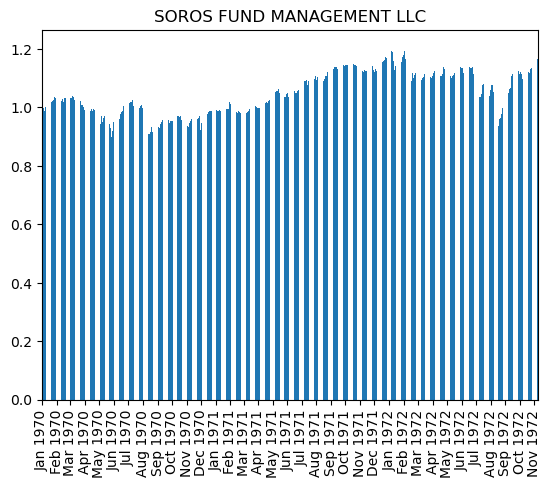

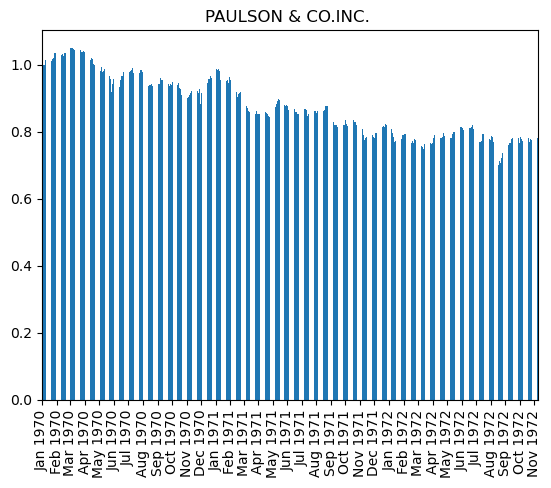

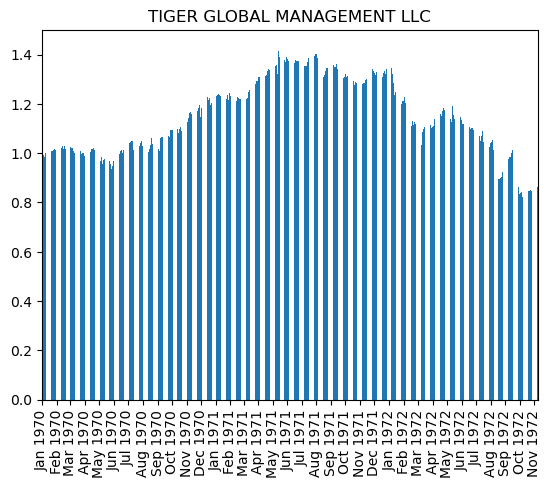

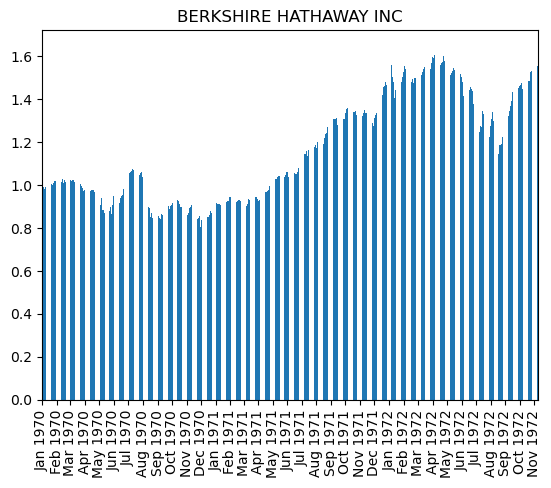

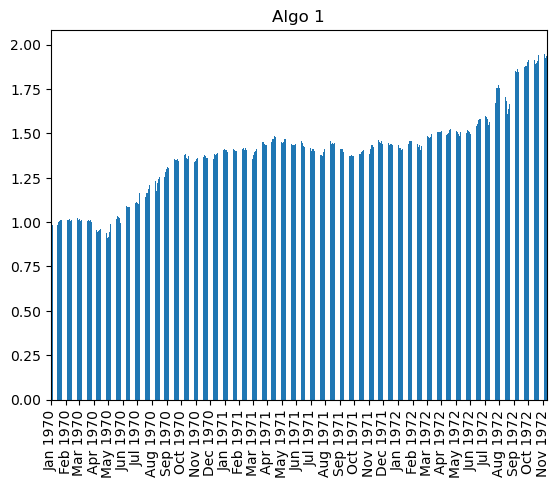

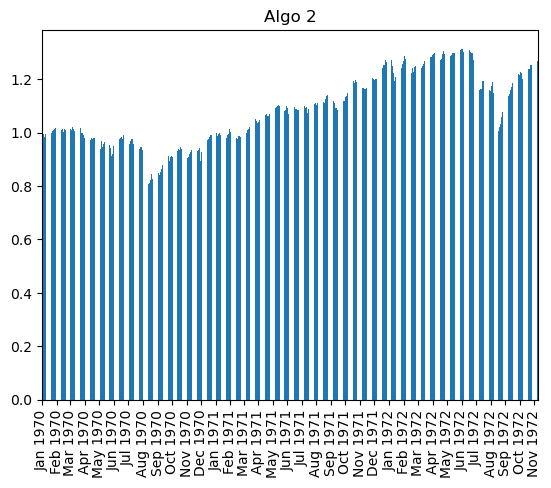

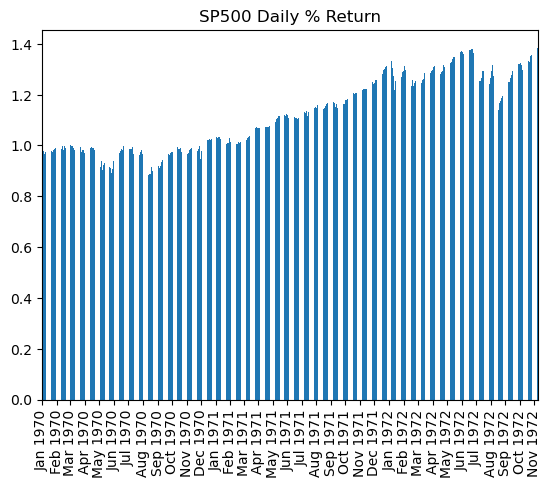

In [642]:
# Calculate cumulative returns of all portfolios

# cuml_returns_list = []
# for column in combined_df.columns:                                             # help from CHAT GPT
#     new_cuml_return = (1 + combined_df[column]).cumprod() 
#     cuml_returns_list.append(new_cuml_return)

    #new_plot.xaxis.set_major_locator(MonthLocator())                            #help from CHAT GPT
    #new_plot.xaxis.set_major_formatter(DateFormatter("%b %Y"))                  #help from CHAT GPT  


#create the new data frame for cumulative returns
cuml_return_df = pd.DataFrame()

for column in combined_df.columns:
    new_cuml_return = (1 + combined_df[column]).cumprod() 
    cuml_return_df = pd.concat([cuml_return_df, new_cuml_return], axis=1)

cuml_return_df.head()



# Plot cumulative returns
# Save each plot into a list for later access

cuml_returns_plot_list = []
for column in cuml_return_df.columns:
    new_plot1 = cuml_return_df[column].plot(kind='bar', title=column) 
    new_plot1.xaxis.set_major_locator(MonthLocator())                            
    new_plot1.xaxis.set_major_formatter(DateFormatter("%b %Y"))               
    cuml_returns_plot_list.append(new_plot1)
    plt.show()




#EXTRA BELOW:
# for column in combined_df.columns:                                             # help from CHAT GPT
#     new_plot = combined_df[column].plot(kind='bar', title=column)              # help from CHAT GPT
#     returns_plot_list.append(new_plot)
#     new_plot.xaxis.set_major_locator(MonthLocator())                            #help from CHAT GPT
#     new_plot.xaxis.set_major_formatter(DateFormatter("%b %Y"))                  #help from CHAT GPT  
#     plt.show()



# Plot cumulative returns

# cuml_plot_list = []
# for x in range(len(cuml_returns_list)):                                           
#     new_cuml_plot = cuml_returns_list[x].plot(title = cuml_returns_list[])
#     cuml_plot_list.append(new_cuml_plot)
#     plt.show()
#cuml_returns_list


# cuml_returns_plot_list = []


# for column in cuml_return_df.columns:
#     new_plot1 = cuml_return_df[column].plot(kind='bar', title=column)              
#     new_plot1.xaxis.set_major_locator(MonthLocator())                            
#     new_plot1.xaxis.set_major_formatter(DateFormatter("%b %Y"))                    
#     cuml_returns_plot_list.append(new_plot1)
#     plt.show()
    


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


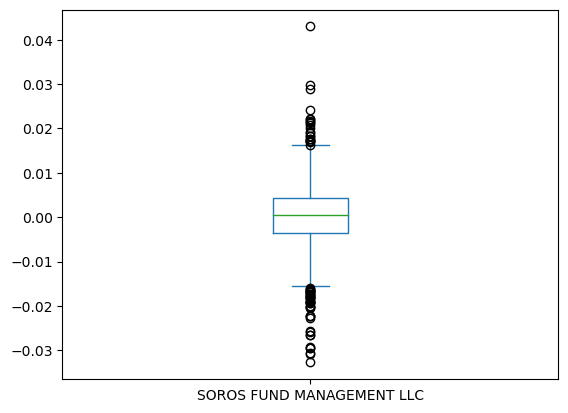

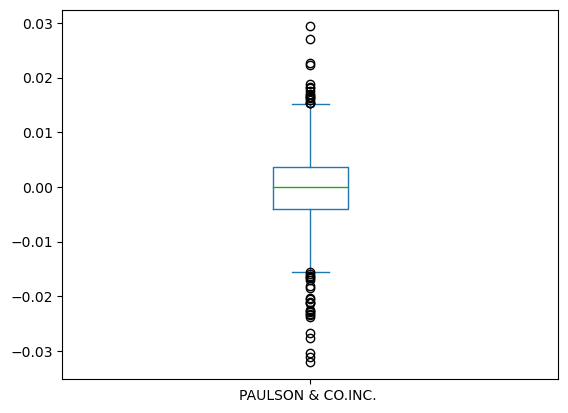

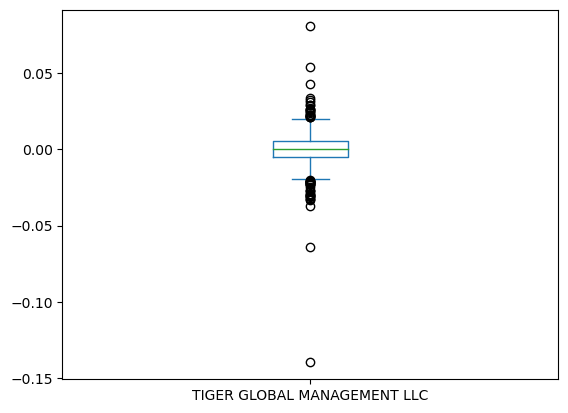

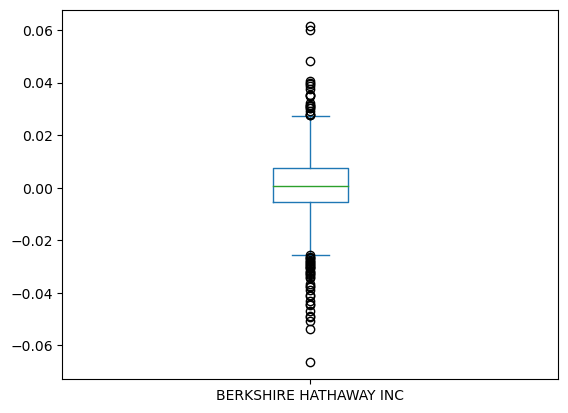

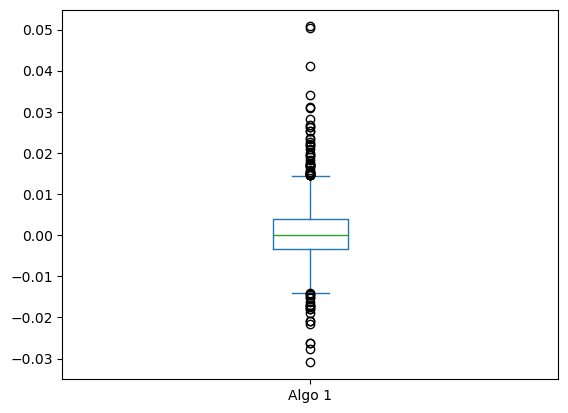

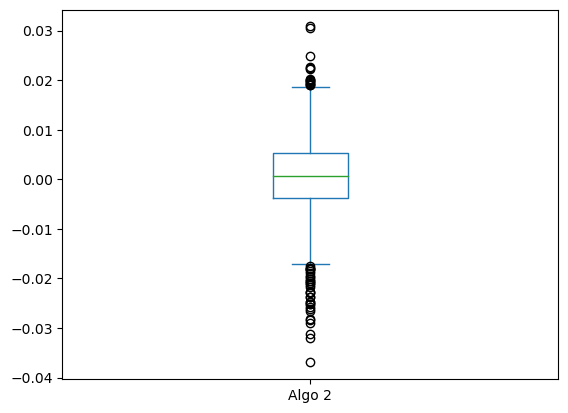

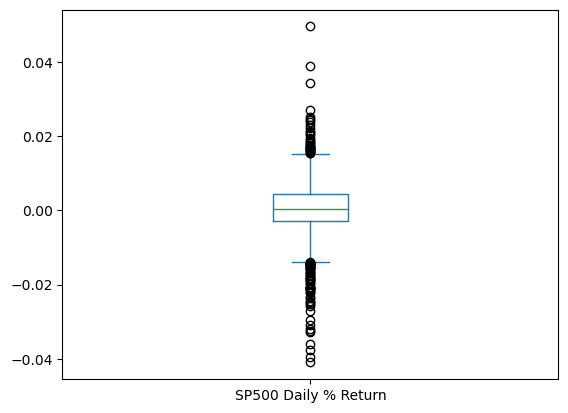

In [562]:
# Box plot to visually show risk

for column in combined_df.columns:
    combined_df[column].plot(kind='box')
    plt.show()



### Calculate Standard Deviations

In [563]:
# Calculate the daily standard deviations of all portfolios
all_returns_sd = combined_df.std()
all_returns_sd

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily % Return           0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [564]:
# Calculate  the daily standard deviation of S&P 500

sp500_std = all_returns_sd['SP500 Daily % Return']


# Determine which portfolios are riskier than the S&P 500

index1 = 0
for x in all_returns_sd[:-1]:
    if x > sp500_std:
        print(f"{all_returns_sd.index[index1]} is 'riskier' than investing in the S&P 500")
        index1+=1

    elif x == sp500_std:
        print(f"{all_returns_sd.index[index1]} is very close to investing in the S&P 500")
        index1+=1

    else:
        print(f"{all_returns_sd.index[index1]} is less 'risky' than investing in the S&P 500")
        index1+=1


SOROS FUND MANAGEMENT LLC is less 'risky' than investing in the S&P 500
PAULSON & CO.INC.  is less 'risky' than investing in the S&P 500
TIGER GLOBAL MANAGEMENT LLC is 'riskier' than investing in the S&P 500
BERKSHIRE HATHAWAY INC is 'riskier' than investing in the S&P 500
Algo 1 is less 'risky' than investing in the S&P 500
Algo 2 is less 'risky' than investing in the S&P 500


### Calculate the Annualized Standard Deviation

In [565]:
# Calculate the annualized standard deviation (252 trading days)

all_std_annual = all_returns_sd * np.sqrt(252)
all_std_annual


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily % Return           0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

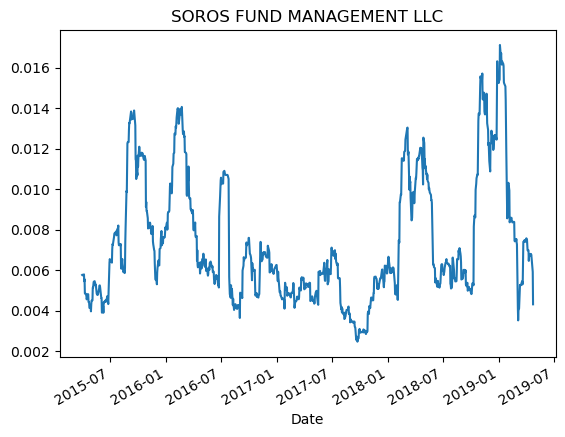

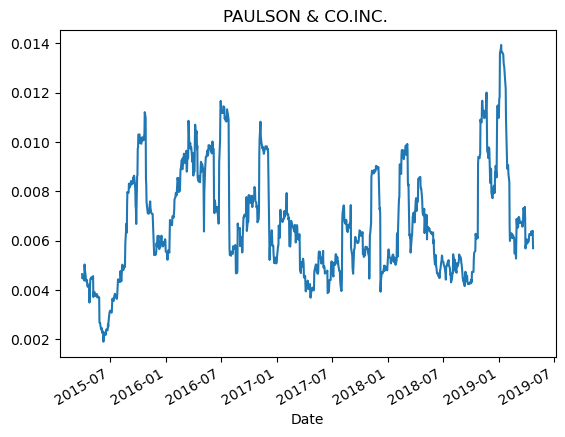

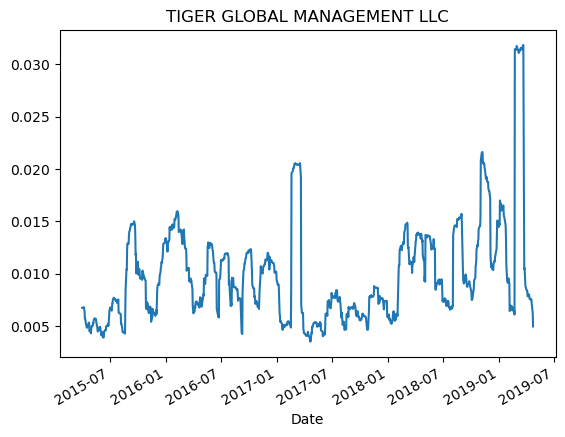

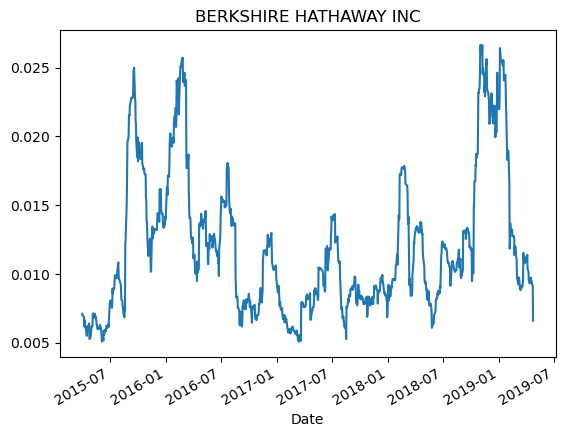

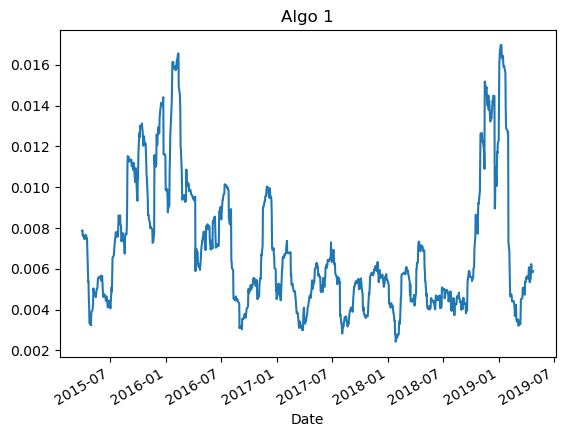

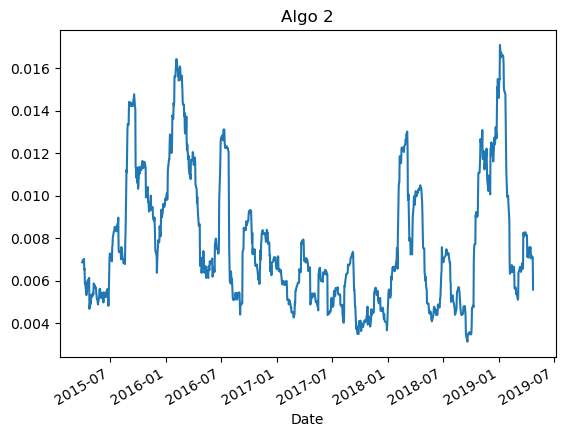

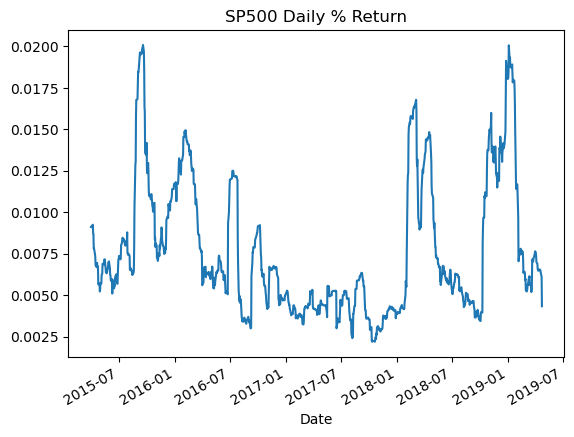

In [631]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviations
for column in combined_df.columns:
    new_rolling21_std = combined_df[column].rolling(window=21).std()
    new_rolling21_std.plot(title=column)
    plt.show()

### Calculate and plot the correlation

<Axes: >

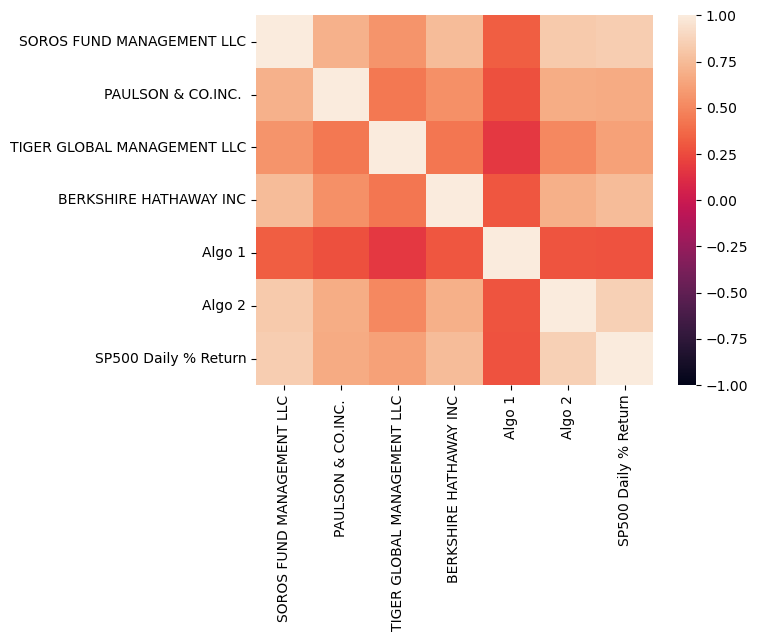

In [633]:
# Calculate the correlation
all_portfolios_correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(all_portfolios_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [641]:
# Calculate covariance of a single portfolio

berkshire_sp500_cov = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500 Daily % Return'])

# Calculate variance of S&P 500
sp500_var = combined_df['SP500 Daily % Return'].var()


# Computing beta
berkshire_beta = berkshire_sp500_cov / sp500_var

# Plot beta trend



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [569]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [570]:
# Annualized Sharpe Ratios

#returns over std





In [571]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [572]:
# Initial imports
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


In [573]:
# Load .env environment variables
load_dotenv()

True

In [574]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [575]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [576]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [577]:
# Format current date as ISO format
end = pd.Timestamp("2019-04-16", tz="America/New_York").isoformat()
start = pd.Timestamp("2015-03-03", tz="America/New_York").isoformat()

In [578]:
# Set the tickers
tickers = ["AMD", "MU", "NVDA", "INTC", "NFLX"]

In [579]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [598]:
# Get daily closing prices for one year on the 5 above tickers
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
portfolio_df

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,2.770,2.820,2.6300,43863,2.77,33698464,2.716368,AMD
2016-01-05 05:00:00+00:00,2.750,2.800,2.6400,27271,2.77,13372522,2.718820,AMD
2016-01-06 05:00:00+00:00,2.505,2.710,2.4700,32863,2.66,24280750,2.578019,AMD
2016-01-07 05:00:00+00:00,2.275,2.480,2.2600,37016,2.43,22577907,2.356635,AMD
2016-01-08 05:00:00+00:00,2.140,2.425,2.1000,37160,2.36,34037306,2.191897,AMD
...,...,...,...,...,...,...,...,...
2019-04-10 04:00:00+00:00,192.100,193.140,189.0500,100631,189.23,11455822,191.689036,NVDA
2019-04-11 04:00:00+00:00,191.540,193.470,189.5500,85487,192.20,9637449,191.555087,NVDA
2019-04-12 04:00:00+00:00,190.010,193.260,189.6600,77374,193.10,12245635,190.854047,NVDA


In [675]:
# Reading data from 1st stock
# I REALLY WANT TO ITERATE THIS WHOLE PROCESS BUT RAN OUT OF TIME

amd_data = portfolio_df[portfolio_df['symbol']=='AMD']
keep_column = 'close'
amd_data = amd_data.drop(columns = [col for col in amd_data.columns if col != keep_column], axis=1)
amd_data = amd_data.rename(columns = {"close": 'AMD'})
amd_data


,AMD
timestamp,
2016-01-04 05:00:00+00:00,2.770
2016-01-05 05:00:00+00:00,2.750
2016-01-06 05:00:00+00:00,2.505
2016-01-07 05:00:00+00:00,2.275
2016-01-08 05:00:00+00:00,2.140
...,...
2019-04-10 04:00:00+00:00,27.830
2019-04-11 04:00:00+00:00,27.790
2019-04-12 04:00:00+00:00,27.850


In [676]:
# Reading data from 2nd stock

mu_data = portfolio_df[portfolio_df['symbol']=='MU']
mu_data = mu_data.drop(columns = [col for col in mu_data.columns if col != keep_column], axis=1)
mu_data = mu_data.rename(columns = {"close": 'MU'})

mu_data

,MU
timestamp,
2016-01-04 05:00:00+00:00,14.33
2016-01-05 05:00:00+00:00,14.82
2016-01-06 05:00:00+00:00,14.22
2016-01-07 05:00:00+00:00,13.66
2016-01-08 05:00:00+00:00,13.33
...,...
2019-04-10 04:00:00+00:00,42.17
2019-04-11 04:00:00+00:00,42.28
2019-04-12 04:00:00+00:00,42.01


In [677]:
# Reading data from 3rd stock
nvda_data = portfolio_df[portfolio_df['symbol']=='NVDA']
nvda_data = nvda_data.drop(columns = [col for col in nvda_data.columns if col != keep_column])
nvda_data = nvda_data.rename(columns = {"close": 'NVDA'})

nvda_data

,NVDA
timestamp,
2016-01-04 05:00:00+00:00,32.37
2016-01-05 05:00:00+00:00,32.89
2016-01-06 05:00:00+00:00,31.53
2016-01-07 05:00:00+00:00,30.28
2016-01-08 05:00:00+00:00,29.63
...,...
2019-04-10 04:00:00+00:00,192.10
2019-04-11 04:00:00+00:00,191.54
2019-04-12 04:00:00+00:00,190.01


In [678]:
# Reading data from 4th stock

intc_data = portfolio_df[portfolio_df['symbol']=='INTC']
intc_data = intc_data.drop(columns = [col for col in intc_data.columns if col != keep_column], axis=1)
intc_data = intc_data.rename(columns = {"close": 'INTC'})

intc_data

,INTC
timestamp,
2016-01-04 05:00:00+00:00,33.99
2016-01-05 05:00:00+00:00,33.83
2016-01-06 05:00:00+00:00,33.08
2016-01-07 05:00:00+00:00,31.84
2016-01-08 05:00:00+00:00,31.51
...,...
2019-04-10 04:00:00+00:00,55.75
2019-04-11 04:00:00+00:00,55.80
2019-04-12 04:00:00+00:00,56.42


In [680]:
# Reading data from 5th stock
nflx_data = portfolio_df[portfolio_df['symbol']=='NFLX']
nflx_data = nflx_data.drop(columns = [col for col in nflx_data.columns if col != keep_column], axis=1)
nflx_data = nflx_data.rename(columns = {"close": 'NFLX'})

nflx_data

,NFLX
timestamp,
2016-01-04 05:00:00+00:00,109.96
2016-01-05 05:00:00+00:00,107.66
2016-01-06 05:00:00+00:00,117.68
2016-01-07 05:00:00+00:00,114.56
2016-01-08 05:00:00+00:00,111.39
...,...
2019-04-10 04:00:00+00:00,363.92
2019-04-11 04:00:00+00:00,367.65
2019-04-12 04:00:00+00:00,351.14


In [689]:
# Combine all stocks in a single DataFrame




# Reorganize the DataFrame

# Reorganize portfolio data by having a column per symbol


# Separate ticker data
# AMD = portfolio_df[portfolio_df['symbol']=='OM'].drop('symbol', axis=1)
# SLAB = portfolio_df[portfolio_df['symbol']=='SLAB'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
montys_portfolio_df = pd.concat([amd_data, mu_data, nvda_data, intc_data, nflx_data],axis=1)

#cool_list = ['AMD', 'MU', 'NVDA', 'INTC', 'NFLX']


#for x in cool_list:
#    montys_portfolio_df = montys_portfolio_df.rename(columns={'close': column})



#my_df_grp.rename(columns={"Close': 'closing_price'})

# Display sample data
montys_portfolio_df

#montys_portfolio_df = montys_portfolio_df.drop(montys_portfolio_df)




,AMD,MU,NVDA,INTC,NFLX
timestamp,,,,,
2016-01-04 05:00:00+00:00,2.770,14.33,32.37,33.99,109.96
2016-01-05 05:00:00+00:00,2.750,14.82,32.89,33.83,107.66
2016-01-06 05:00:00+00:00,2.505,14.22,31.53,33.08,117.68
2016-01-07 05:00:00+00:00,2.275,13.66,30.28,31.84,114.56
2016-01-08 05:00:00+00:00,2.140,13.33,29.63,31.51,111.39
...,...,...,...,...,...
2019-04-10 04:00:00+00:00,27.830,42.17,192.10,55.75,363.92
2019-04-11 04:00:00+00:00,27.790,42.28,191.54,55.80,367.65
2019-04-12 04:00:00+00:00,27.850,42.01,190.01,56.42,351.14


In [690]:
# Reset Date index
montys_portfolio_df(set_inde)



#my_data = pd.read_csv(csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


TypeError: 'DataFrame' object is not callable

In [625]:
# Calculate daily returns
montys_portfolio_daily_returns = montys_portfolio_df.pct_change()
# Drop NAs
montys_portfolio_daily_returns = montys_portfolio_daily_returns.dropna().copy()

# Display sample data
montys_portfolio_daily_returns.head()


,AMD,MU,NVDA,INTC,NFLX
,close,close,close,close,close
timestamp,,,,,
2016-01-05 05:00:00+00:00,-0.007220,0.034194,0.016064,-0.004707,-0.020917
2016-01-06 05:00:00+00:00,-0.089091,-0.040486,-0.041350,-0.022170,0.093071
2016-01-07 05:00:00+00:00,-0.091816,-0.039381,-0.039645,-0.037485,-0.026513
2016-01-08 05:00:00+00:00,-0.059341,-0.024158,-0.021466,-0.010364,-0.027671
2016-01-11 05:00:00+00:00,0.093458,-0.060015,0.001687,0.017455,0.032139


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [627]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
initial_investment = 10000  

montys_portfolio_weighted_returns = montys_portfolio_daily_returns.dot(weights)

#cumulative_returns = (1 + montys_portfolio_daily_returns).cumprod()          #reinvesting proceeds and adding one dollar
#(initial_investment * cumulative_returns).plot()                # how our initial investment grows over time

# Display sample data
montys_portfolio_weighted_returns

timestamp
2016-01-05 05:00:00+00:00    0.003483
2016-01-06 05:00:00+00:00   -0.020005
2016-01-07 05:00:00+00:00   -0.046968
2016-01-08 05:00:00+00:00   -0.028600
2016-01-11 05:00:00+00:00    0.016945
                               ...   
2019-04-10 04:00:00+00:00    0.010612
2019-04-11 04:00:00+00:00    0.001880
2019-04-12 04:00:00+00:00   -0.009202
2019-04-15 04:00:00+00:00   -0.012017
2019-04-16 04:00:00+00:00    0.020286
Length: 826, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [ ]:
#Amazing, all short stocks at the perfect time, having hindsight on my side... I couldn't lose!!